<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [51]:
import pandas as pd
%matplotlib inline

Load the dataset into a dataframe.


In [63]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
print(df)

       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
3              16  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
...           ...                             ...      ...   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   
11397       25142  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
3              

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

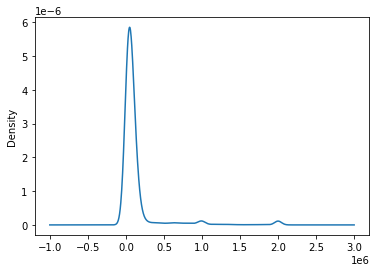

In [59]:
df['ConvertedComp'].plot.kde()

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

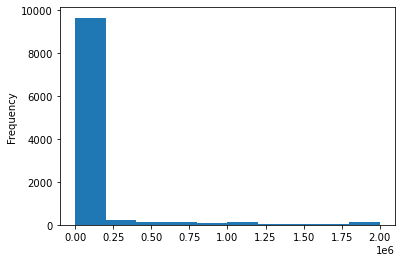

In [60]:
# your code goes here
df['ConvertedComp'].plot.hist()

What is the median of the column `ConvertedComp`?


In [61]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [68]:
# your code goes here
df['Gender'].value_counts()[0]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [69]:
# your code goes here
df_w=df[df['Gender']=='Woman']
df_w['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [71]:
# your code goes here
dicts={}
ks=range(5)
keys=['min','q1','median','q3','max']
val=[df['Age'].min(),df['Age'].quantile(q=0.25),df['Age'].median(),df['Age'].quantile(q=0.75),df['Age'].max()]
for i in ks:
    dicts[keys[i]]=val[i]
print(dicts)

{'min': 16.0, 'q1': 25.0, 'median': 29.0, 'q3': 35.0, 'max': 99.0}


Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

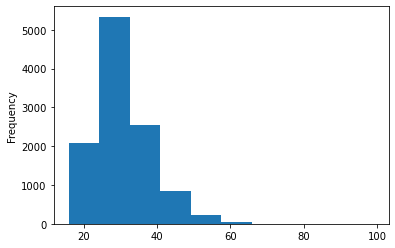

In [72]:
# your code goes here
df['Age'].plot.hist()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

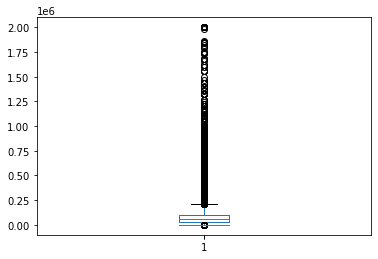

In [98]:
# your code goes here
df['ConvertedComp'].plot.box()

<AxesSubplot:>

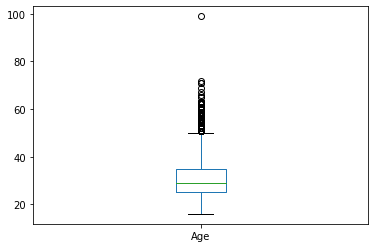

In [99]:
df['Age'].plot.box()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [74]:
# your code goes here
IQR=df['ConvertedComp'].quantile(q=0.75)-df['ConvertedComp'].quantile(q=0.25)

Find out the upper and lower bounds.


In [75]:
# your code goes here
low_bound=df['ConvertedComp'].quantile(q=0.25)-1.5*IQR
up_bound=df['ConvertedComp'].quantile(q=0.75)+1.5*IQR

Identify how many outliers are there in the `ConvertedComp` column.


In [86]:
# your code goes here
df[(df['ConvertedComp']<low_bound) | (df['ConvertedComp']>up_bound)].ConvertedComp.count()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [101]:
# your code goes here
df_f=df[(df['ConvertedComp']>low_bound) & (df['ConvertedComp']<up_bound)]
df_f['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [96]:
# your code goes here
num_col=list(df.select_dtypes(include=['int64','float64']).columns)
dicts={}
for i in range(len(num_col)-1):
    dicts[num_col[i]]=df['Age'].corr(df[num_col[i]])
for (a,b) in dicts.items():
    print("The correlation between Age and "+a+" is "+str(b))
    
    

The correlation between Age and Respondent is 0.00404103082877392
The correlation between Age and CompTotal is 0.006969933096795747
The correlation between Age and ConvertedComp is 0.10538616072629153
The correlation between Age and WorkWeekHrs is 0.03651764909319289
The correlation between Age and CodeRevHrs is -0.020469111970030124


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
